In [1]:
%matplotlib ipympl
def figure(name, nrows=1, ncols=1, *args, **kwargs):
    plt.close(name)
    return plt.subplots(nrows, ncols, num=name, *args, **kwargs)

def figure3d(name, nrows=1, ncols=1, *args, **kwargs):
    plt.close(name)
    return plt.subplots(nrows, ncols, num=name, subplot_kw={"projection": "3d"}, *args, **kwargs)

import numpy as np
import pylab as plt
plt.style.use('default')

In [3]:
import sympy as sm
sm.init_printing()

In [61]:
a, E, x, y = sm.symbols('a E x y')
b = sm.Symbol('b', real=True)
I = sm.I

# Rotate Matrix

In [62]:
pol_x = sm.Matrix([[1, 0], 
                   [0, 0]])
pol_y = sm.Matrix([[0, 0], 
                   [0, 1]])
rot = sm.Matrix([[sm.cos(a), -sm.sin(a)], 
                 [sm.sin(a), sm.cos(a)]])
rot_t = sm.Matrix([[sm.cos(a), sm.sin(a)], 
                   [-sm.sin(a), sm.cos(a)]])

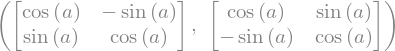

In [63]:
rot, rot_t

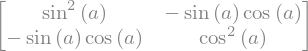

In [64]:
pol_yr = rot * pol_y * rot_t
pol_yr

# Excercise 1

In [65]:
A = pol_y
B = pol_yr
C = pol_x
j_in = sm.Matrix([x, y])

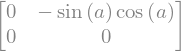

In [66]:
S = C * B * A
S

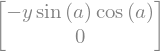

In [67]:
S * j_in

Text(0.5, 0, '$\\phi/\\pi$')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
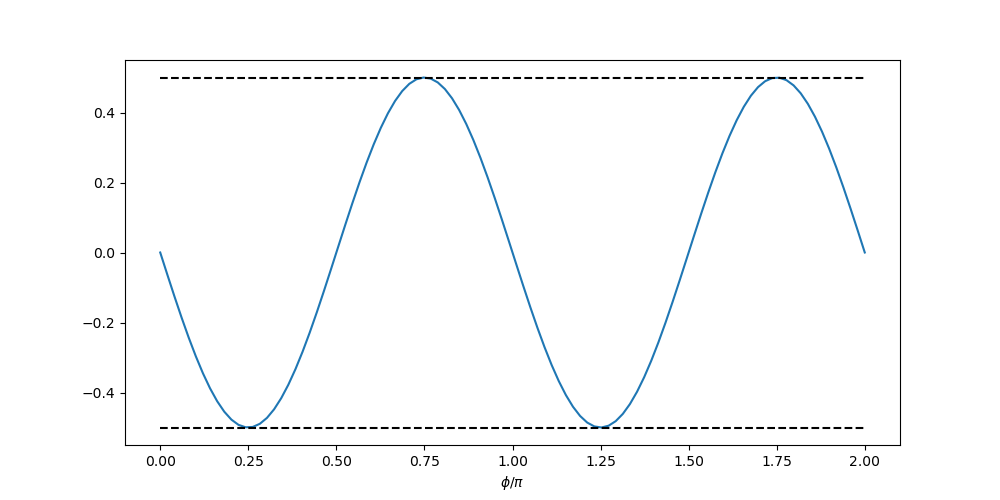

In [78]:
fig, ax = figure('ex_1', 1, 1, figsize=(10, 5))
phis = np.linspace(0, 2*np.pi, 100)
ax.plot(phis / np.pi, -np.sin(phis) * np.cos(phis))
ax.plot(phis / np.pi, [0.5]*100, 'k--')
ax.plot(phis / np.pi, [-0.5]*100, 'k--')
ax.set_xlabel('$\phi/\pi$')

# Exercise 2

In [72]:
Norm = lambda vec: sm.sqrt(vec.dot(vec.conjugate()))

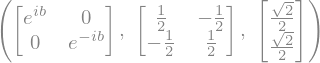

In [68]:
M = sm.Matrix([[sm.exp(I*b), 0], 
               [0, sm.exp(-I*b)]])
pol_m = pol_yr.subs(a, sm.pi/4)
j_in = 1/sm.sqrt(2) * sm.Matrix([1, 1])

(M, pol_m, j_in)

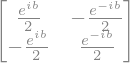

In [69]:
S = pol_m * M
S

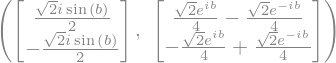

In [70]:
j_out = sm.simplify(S * j_in)
(j_out, S * j_in)

In [73]:
Norm(j_out)

# Exercise 3

In [91]:
from ipywidgets import FloatSlider, HBox

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
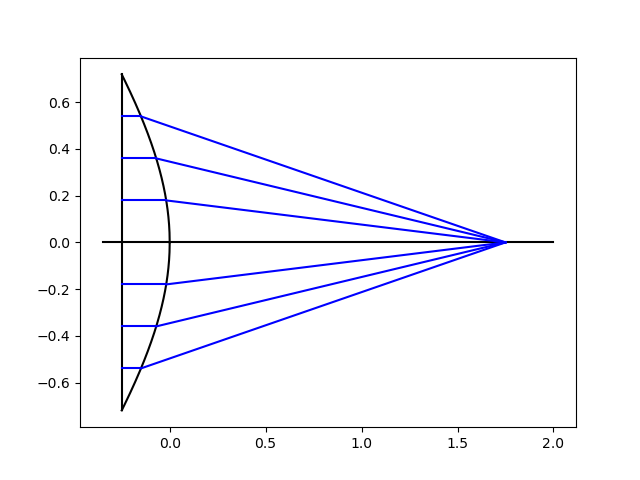

In [126]:
def get_slider():
    sn = FloatSlider(
        orientation='horizontal', description='n: ',
        value=1.5, min=1, max=2, step = 0.1
    )
    sf = FloatSlider(
        orientation='horizontal', description='f: ',
        value=2, min=1, max=3, step = 0.1
    )
        
    D = 0.25
    x = np.linspace(0, -D, 1000)
    
    n = sn.value
    f = sf.value
    n = 1.5
    f = 2 - D
    y = np.sqrt(n - 1) * np.sqrt((n+1)*x**2 - 2*f*x)
    
    fig, ax = figure(2)
    lines = []
    lines.append(ax.plot(x, y, 'k')[0])
    lines.append(ax.plot(x, -y, 'k')[0])
    lines.append(ax.plot([-D, -D], [y[-1], -y[-1]], 'k')[0])
    ax.plot([-0.35, 2], [0, 0], 'k-')
    
    for scale in [0.25, 0.5, 0.75]:
        s = f / (n+1) - np.sqrt((f / (n+1))**2 + scale**2*(D**2 + 2*f*D/(n+1)))
        lines.append(ax.plot([-D, s], [y[-1]*scale, y[-1]*scale], 'b')[0])
        lines.append(ax.plot([s, f], [y[-1]*scale, 0], 'b')[0])
        
        lines.append(ax.plot([-D, s], [-y[-1]*scale, -y[-1]*scale], 'b')[0])
        lines.append(ax.plot([s, f], [-y[-1]*scale, 0], 'b')[0])
        
    def redraw(change):
        n = sn.value
        f = sf.value - D
        y = np.sqrt(n - 1) * np.sqrt((n+1)*x**2 - 2*f*x)
        
        lines[0].set_data(x, y)
        lines[1].set_data(x, -y)
        lines[2].set_data([-D, -D], [y[-1], -y[-1]])
        
        for j, scale in enumerate([0.25, 0.5, 0.75]):
            s = f / (n+1) - np.sqrt((f / (n+1))**2 + scale**2*(D**2 + 2*f*D/(n+1)))
            lines[3 + 4*j].set_data([-D, s], [y[-1]*scale, y[-1]*scale])
            lines[4 + 4*j].set_data([s, f], [y[-1]*scale, 0])

            lines[5 + 4*j].set_data([-D, s], [-y[-1]*scale, -y[-1]*scale])
            lines[6 + 4*j].set_data([s, f], [-y[-1]*scale, 0])
        
        fig.canvas.draw()
        fig.canvas.flush_events()
        
    sn.observe(redraw, names='value')
    sf.observe(redraw, names='value')
    return HBox([sn, sf])

get_slider()